In [10]:
library('readr')
library('blabr')
library('plyr')
library('dplyr')
library('ggplot2')
library('rjson')
library('parallel')
library("readxl")
library('dotwhisker')
library('broom')
library('lme4')
library('irr')
library('tuneR')
library('ggExtra')
library('brms')
library('ggstance')
source('PLEARN_analysis_helper.R')
source('texvars.R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loading required package: lpSolve

Loading required package: Rcpp

Loading 'brms' package (version 2.17.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:lme4’:

    ngrps


The following object is masked from ‘package:stats’:

    ar



Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh




Because we need to run automated checks of usability of eyetracking data, the counting of usable participants comes in the final notebook

# Load Data Objects

In [4]:
ed_df = readRDS(file='intermediate_data/eyetracking_fixations_df.RData')
subject_info = readRDS(file='intermediate_data/subject_info.RData')

# Counting Participants

In [2]:
kept_subj_filenames = unique(subset(ed_df, child_in_study & !exclude_subject)$filename)
kept_subj_filenames

[1] "pl00_fixations.txt"  "pl01_fixations.txt"  "pl03_fixations.txt" 
  [4] "pl09_fixations.txt"  "pl10_fixations.txt"  "pl100_fixations.txt"
  [7] "pl101_fixations.txt" "pl103_fixations.txt" "pl105_fixations.txt"
 [10] "pl106_fixations.txt" "pl107_fixations.txt" "pl108_fixations.txt"
 [13] "pl109_fixations.txt" "pl11_fixations.txt"  "pl110_fixations.txt"
 [16] "pl111_fixations.txt" "pl112_fixations.txt" "pl113_fixations.txt"
 [19] "pl115_fixations.txt" "pl116_fixations.txt" "pl118_fixations.txt"
 [22] "pl119_fixations.txt" "pl122_fixations.txt" "pl123_fixations.txt"
 [25] "pl124_fixations.txt" "pl126_fixations.txt" "pl128_fixations.txt"
 [28] "pl129_fixations.txt" "pl132_fixations.txt" "pl133_fixations.txt"
 [31] "pl134_fixations.txt" "pl136_fixations.txt" "pl137_fixations.txt"
 [34] "pl138_fixations.txt" "pl139_fixations.txt" "pl14_fixations.xlsx"
 [37] "pl140_fixations.txt" "pl141_fixations.txt" "pl142_fixations.txt"
 [40] "pl143_fixations.txt" "pl145_fixations.txt" "pl146_fixations.txt"
 [43] "pl147_fixations.txt" "pl148_fixations.txt" "pl15_fixations.xlsx"
 [46] "pl150_fixations.txt" "pl152_fixations.txt" "pl153_fixations.txt"
 [49] "pl154_fixations.txt" "pl155_fixations.txt" "pl16_fixations.xlsx"
 [52] "pl18_fixations.xlsx" "pl19_fixations.xlsx" "pl20_fixations.xlsx"
 [55] "pl24_fixations.xlsx" "pl25_fixations.xlsx" "pl28_fixations.xlsx"
 [58] "pl29_fixations.xlsx" "pl30_fixations.xlsx" "pl31_fixations.xlsx"
 [61] "pl36_fixations.xlsx" "pl37_fixations.xlsx" "pl38_fixations.xlsx"
 [64] "pl39_fixations.xlsx" "pl41_fixations.xlsx" "pl42_fixations.xlsx"
 [67] "pl43_fixations.xlsx" "pl45_fixations.xlsx" "pl46_fixations.xlsx"
 [70] "pl47_fixations.xlsx" "pl48_fixations.xlsx" "pl49_fixations.xlsx"
 [73] "pl50_fixations.xlsx" "pl51_fixations.xlsx" "pl52_fixations.xlsx"
 [76] "pl55_fixations.xlsx" "pl57_fixations.xlsx" "pl59_fixations.xlsx"
 [79] "pl63_fixations.xlsx" "pl64_fixations.xlsx" "pl66_fixations.xlsx"
 [82] "pl67_fixations.xlsx" "pl68_fixations.txt"  "pl69_fixations.txt" 
 [85] "pl70_fixations.txt"  "pl71_fixations.txt"  "pl73_fixations.txt" 
 [88] "pl74_fixations.txt"  "pl75_fixations.txt"  "pl76_fixations.txt" 
 [91] "pl77_fixations.txt"  "pl79_fixations.txt"  "pl81_fixations.txt" 
 [94] "pl82_fixations.txt"  "pl83_fixations.txt"  "pl85_fixations.txt" 
 [97] "pl86_fixations.txt"  "pl87_fixations.txt"  "pl88_fixations.txt" 
[100] "pl89_fixations.txt"  "pl91_fixations.txt"  "pl94_fixations.txt" 
[103] "pl95_fixations.txt"  "pl96_fixations.txt"  "pl97_fixations.txt" 
[106] "pl99_fixations.txt"

In [5]:
subject_info$exclude_subject = !(subject_info$filename %in% kept_subj_filenames)

In [6]:
subject_info$auto_age_group = ceiling(((subject_info$age_in_days / 30.5) - 24) / 4)
subject_info$auto_age_group[subject_info$auto_age_group == 4] = 3
subject_info$auto_age_group[subject_info$auto_age_group == 0] = 1

In [7]:
num_per_age_group  = aggregate(filename ~ auto_age_group + expt_version, subset(subject_info, !exclude_subject), length)
names(num_per_age_group)[names(num_per_age_group) == 'filename'] = 'completed'
num_per_age_group$desired = 12
num_per_age_group$remaining = num_per_age_group$desired - num_per_age_group$completed
subset(num_per_age_group, expt_version %in% c('agreement', 'redblue','scene'))[,c('expt_version', 'auto_age_group', 'remaining')]

,expt_version,auto_age_group,remaining
,<chr>,<dbl>,<dbl>
1,agreement,1,-3
2,agreement,2,3
3,agreement,3,0
4,redblue,1,-1
5,redblue,2,1
6,redblue,3,0
7,scene,1,-1
8,scene,2,3
9,scene,3,0


In [8]:
aggregate(completed ~ expt_version, num_per_age_group, sum)

expt_version,completed
<chr>,<int>
agreement,36
redblue,36
scene,34


# Final Age Distribution

In [23]:
names(subject_info)

[1] "participant_name"    "id"                  "include_eyetracking"
 [4] "include_storybook"   "filename"            "age_in_days"        
 [7] "gender"              "type"                "expt_version"       
[10] "group"               "order"               "comment"            
[13] "main_coder"          "main_validated"      "double_coder"       
[16] "double_validated"    "comments"            "trial_order"        
[19] "age_in_months"       "ran_participant"     "child_in_study"     
[22] "broad_score"         "narrow_score"        "fam_pl"             
[25] "nov_pl"              "total_pl"            "exclude_subject"    
[28] "auto_age_group"

In [54]:
subject_info$study = ''
subject_info$study[subject_info$expt_version == 'agreement'] = 'Study 3'
subject_info$study[subject_info$expt_version == 'redblue'] = 'Study 2'
subject_info$study[subject_info$expt_version == 'scene'] = 'Study 1'
subject_info$study = factor(subject_info$study, levels = c('Study 1', 'Study 2', 'Study 3'))

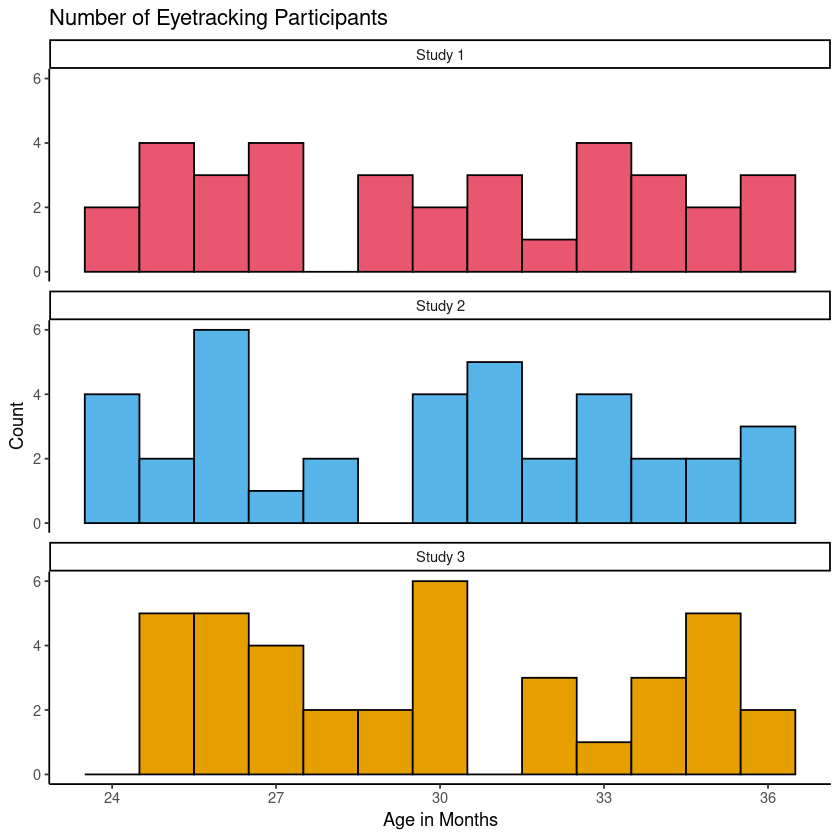

In [62]:
#histogram for age in months for eyetracking
ggplot(subset(subject_info, include_eyetracking & child_in_study)
) + geom_histogram(aes(x=round(age_in_months), fill=study), 
        color='black', bins =13) + theme_classic() + scale_x_continuous(name='Age in Months',
breaks=seq(24,36,3), labels=seq(24,36,3)) + facet_wrap(~study, ncol=1
) + scale_fill_manual(values=c("#E95670", "#56B4E9", "#E69F00"))  + ggtitle('Number of Eyetracking Participants'
) + ylab('Count') + theme(legend.position="none")
ggsave('figures/marginal_eyetracking.pdf', width=4, height=4) 

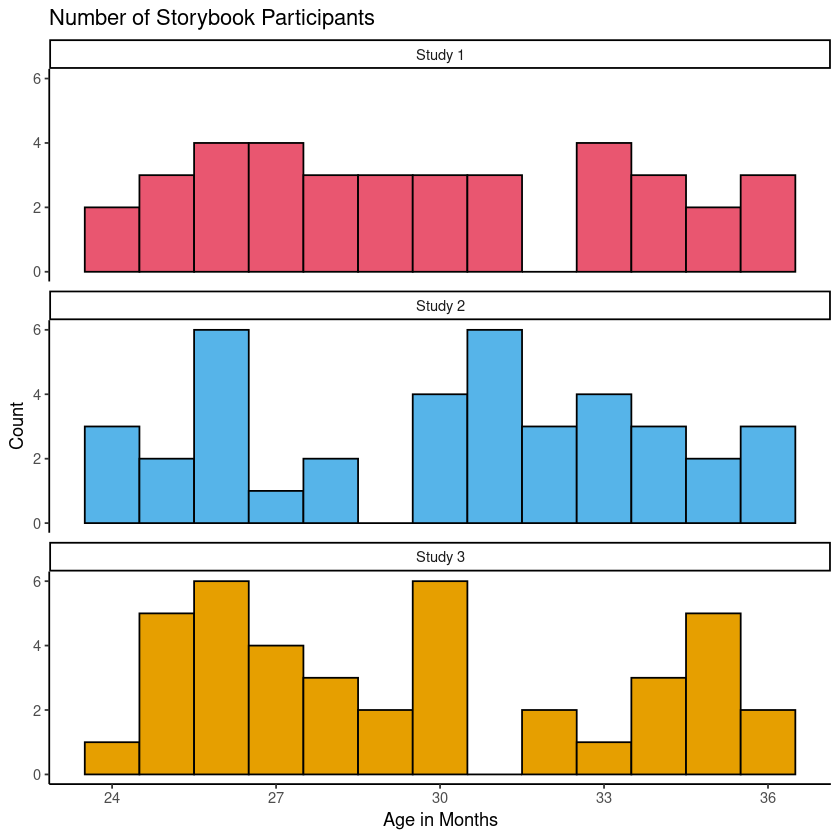

In [63]:
ggplot(subset(subject_info, include_storybook & child_in_study)
) + geom_histogram(aes(round(x=age_in_months), fill = study), color='black',
                   bins =13) + theme_classic() + scale_x_continuous(name='Age in Months',
breaks=seq(24,36,3), labels=seq(24,36,3)) + facet_wrap(~study, ncol=1
) + scale_fill_manual(values=c("#E95670", "#56B4E9", "#E69F00")) + ggtitle('Number of Storybook Participants'
) + ylab('Count') + theme(legend.position="none")
ggsave('figures/marginal_storybook.pdf', width=4, height=4)  